# Data Visualization with Python Studio

At this point, you should already have connected with the rest of your group to divide up who is going to do what. Use this notebook to create your visualizations.

Below we set up the dataframe with the Goodreads dataset for you. If you run this cell, you may get an error that some lines were skipped. Do not worry about that! For this studio, we want to focus on creating an effective

In [9]:
# Here is the setup of the dataframe. Feel free to use .info() or .head() to get a better understanding of what is inside the dataframe!

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("books.csv", error_bad_lines=False)

years = []

for y in df['publication_date']:
    date = y.split("/")
    years.append(date[2])

df["year"] = years
df['year']

C:\Users\praka\AppData\Local\Temp\ipykernel_7924\3514108510.py:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("books.csv", error_bad_lines=False)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


0        2006
1        2004
2        2003
3        2004
4        2004
         ... 
11118    2004
11119    1988
11120    1993
11121    2007
11122    2006
Name: year, Length: 11123, dtype: object

With your dataframe set up, time to start creating visualizations!

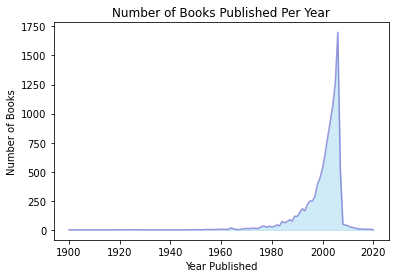

In [10]:
# Use your Python skills to create a visualization here.
# Assuming 'publication_date' is the column with dates in your DataFrame
df['Publication_Date'] = pd.to_datetime(df['publication_date'], errors='coerce')
# Drop rows where 'Publication_Date' is NaT (missing date)
df = df.dropna(subset=['Publication_Date'])
# Create a new column 'Publication_Year'
df['Publication_Year'] = df['Publication_Date'].dt.year
# Group by 'Publication_Year' and count the number of books each year
df_year = df.groupby('Publication_Year').size()
# Plot a simple area chart
plt.fill_between(df_year.index, df_year.values, color="skyblue", alpha=0.4)
plt.plot(df_year.index, df_year.values, color="Slateblue", alpha=0.6)
plt.xlabel('Year Published')
plt.ylabel('Number of Books')
plt.title('Number of Books Published Per Year')
plt.show()

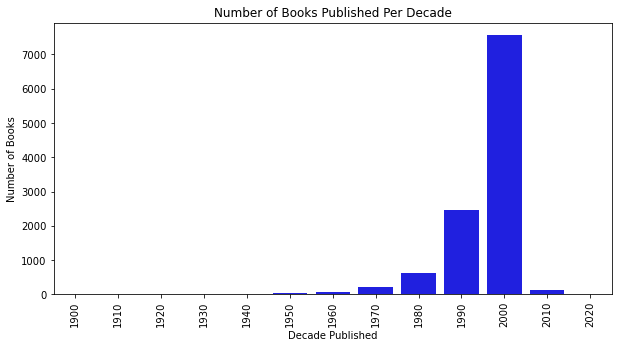

In [11]:
# Use your Python skills to create a visualization here.

# Seaborn.
# Assuming 'Publication_Date' is the column with dates in your DataFrame
df['Publication_Date'] = pd.to_datetime(df['publication_date'], errors='coerce')
# Drop rows where 'Publication_Date' is NaT (missing date)
df = df.dropna(subset=['Publication_Date'])
# Create a new column 'Publication_Year'
df['Publication_Year'] = df['Publication_Date'].dt.year
# Create a new column 'Decade' that represents the decade of publication
df['Decade'] = (df['Publication_Year'] // 10) * 10
# Count the number of books per decade
decade_counts = df['Decade'].value_counts().sort_index()
# Create the plot
plt.figure(figsize=(10, 5))
sb.barplot(x=decade_counts.index, y=decade_counts.values, color='b')
plt.xlabel('Decade Published')
plt.ylabel('Number of Books')
plt.title('Number of Books Published Per Decade')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if many years
plt.show()